In [1]:
import os
import json
import requests
from requests.auth import HTTPBasicAuth
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from IPython.display import display, Markdown
%matplotlib inline

In [2]:
# Set base URL
api = os.environ['API_BASE_URL']
url = api + '/submissions'

# Set API Token
apiToken = os.environ['OPS_API_TOKEN']


# Handle pagination through results
count = 100
offset = 0
itemsStore = []

def paginateRequests(offset):
  # Setup request
  params = {'apiToken': apiToken, 'count': count, 'offset': offset}
  response = requests.get(url, params=params)
  #print('Offset: ' + str(offset))

  # Convert response string to JSON
  dataJson = json.loads(response.text)
  # Grab the retrieved `items`
  dataList = dataJson['items']
  # Determine how many preprint submissions there are
  totalItems = dataJson['itemsMax']
  # Save items to memory
  itemsStore.extend(dataList)
  # Determine how many preprint submissions we have so far
  numberStored = len(itemsStore)
  #print(numberStored)

  if numberStored < totalItems:
    #print('Running another pagination request')
    paginateRequests(numberStored)
  else:
    #print('Finished!')
    itemsStore

# Kick-off requests
paginateRequests(0)

In [3]:
data = pd.DataFrame(itemsStore).sort_values(by=['dateSubmitted'])
data['dateSubmitted'] = pd.to_datetime(data['dateSubmitted'])
data = data.loc[data.status == 3] #Remove in-progress and declined submissions.
data.set_index('dateSubmitted',inplace=True)

count = range(1,len(data) + 1)
data['count'] = count
countsum = count[-1]
today = date.today()
display(Markdown('# As of ' + today.strftime("%B %d, %Y") + ' there are <span style=\"color:red\">'+ str(countsum) + '</span> preprints on Engineering Archive.'))

# As of August 11, 2024 there are <span style="color:red">3362</span> preprints on Engineering Archive.

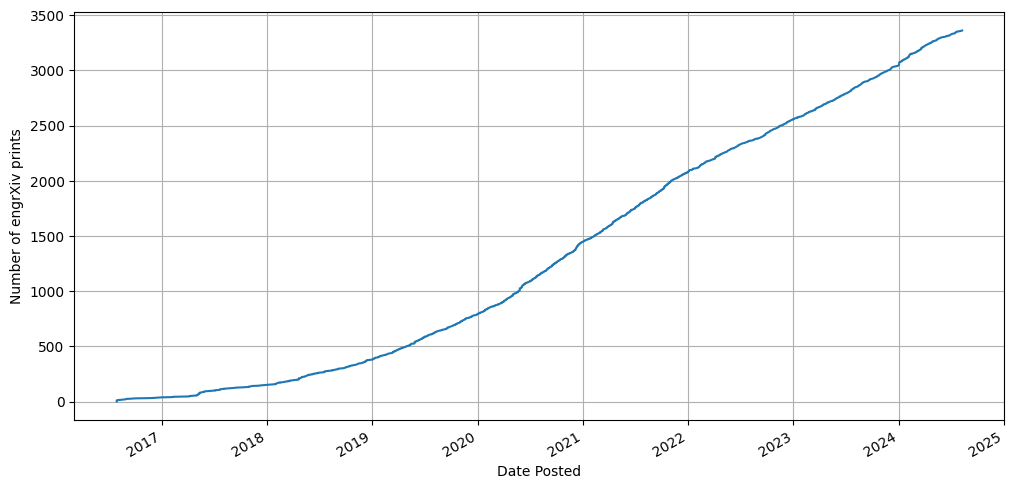

In [4]:
outplot = data.plot(y='count', legend=False, grid='True', figsize=(12,6));
outplot.set_xlabel("Date Posted");
outplot.set_ylabel("Number of engrXiv prints");

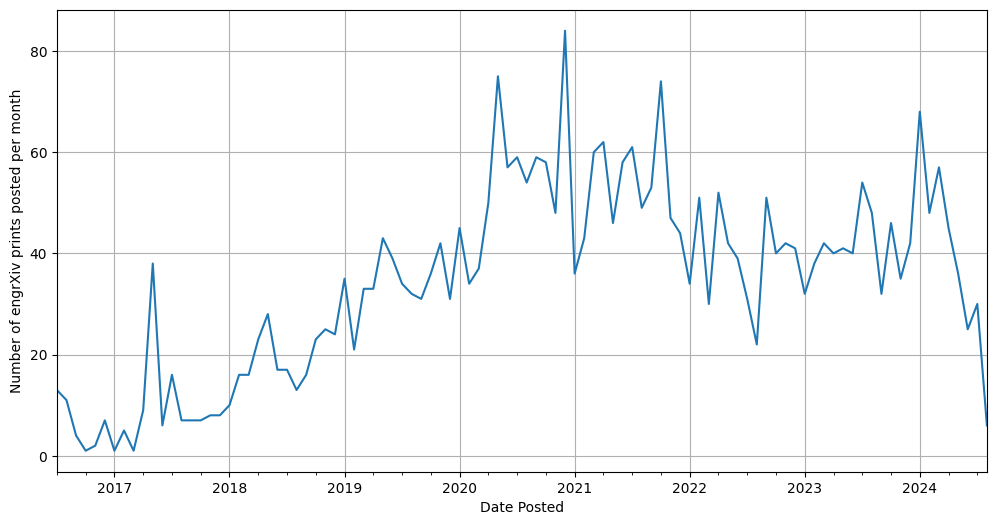

In [5]:
outplot2 = data.resample('M').count().plot(y='count', legend=False, grid='True', figsize=(12,6));
outplot2.set_xlabel("Date Posted");
outplot2.set_ylabel("Number of engrXiv prints posted per month");

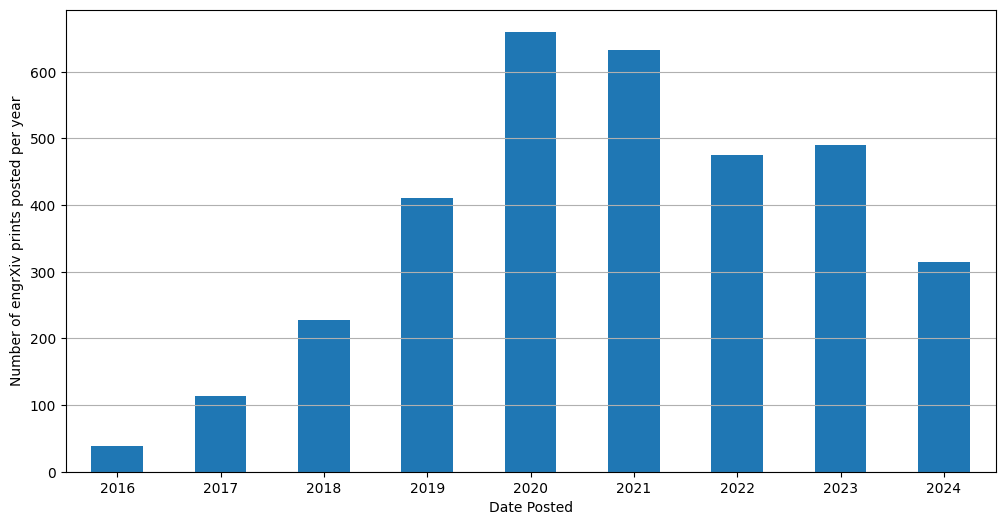

In [6]:
outplot3 = data.resample('Y', kind='period').count().plot.bar(y='count', legend=False, rot=0, grid='True', figsize=(12,6));
outplot3.set_xlabel("Date Posted");
outplot3.set_ylabel("Number of engrXiv prints posted per year");
outplot3.grid(axis='x');

In [7]:
%%html
<style>
div.input {
    display:none;
}
</style>